### Lab-01: Tensor Manipulatioin

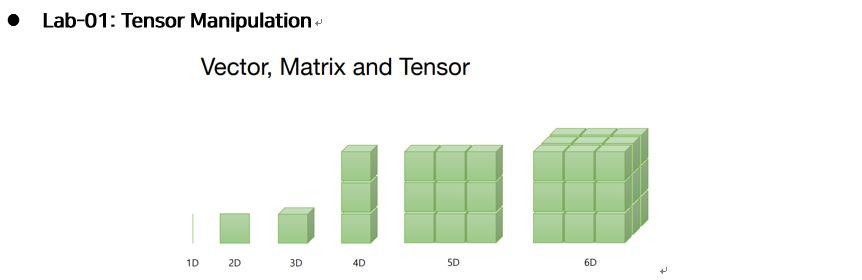

In [ ]:
# import
import numpy as np
import torch

In [ ]:
# 1D Array with NumPy
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1])
print('t[:2] t[3:]     = ', t[:2], t[3:])

[0. 1. 2. 3. 4. 5. 6.]
Rank of t:  1
Shape of t:  (7,)
t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]
t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


In [ ]:
# 2D Array with NumPy
t = np.array([[1.,2.,3.], [4.,5.,6.], [7.,8.,9.], [10.,11.,12.]])
print(t)

print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Rank of t:  2
Shape of t:  (4, 3)


In [ ]:
# 1D Array with PyTorch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.]) # 이렇게 List 형태로 넣어주어야 함
print(t)

print(t.dim())
print(t.shape)
print(t.size())
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


In [ ]:
# 2D Array with PyTorch
t = torch.FloatTensor([[1.,2.,3.],
                       [4.,5.,6.],
                       [7.,8.,9.],
                       [10.,11.,12.]
                       ])
print(t)

print(t.dim())
print(t.size())
print(t[:,1])
print(t[:,1].size())
print(t[:,:-1])

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


In [ ]:
# Broadcasting -> 자동적으로 사이즈를 맞춰서 연산 수행

# 1 x 2 Vector + 2 x 1 Vector
m1 = torch.FloatTensor([[1,2]]) # |m1| = (1,2) -> (2,2)
m2 = torch.FloatTensor([[3], [4]]) # |m2| = (2,1) -> (2,2)
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [ ]:
# Multiplication  vs  Matrix Multiplication

m1 = torch.FloatTensor([[1,2], [3,4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1

print(m1.matmul(m2)) # 2 x 1

print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [ ]:
# Mean -> Can only claculate the mean of floating types

t = torch.FloatTensor([[1,2], [3,4]])
print(t)

print(t.mean())
print(t.mean(dim=0)) # 첫번째 차원을 없앰
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [ ]:
# Sum

t = torch.FloatTensor([[1,2],[3,4]])
print(t)

print(t.sum())
print(t.sum(dim=0)) # 첫번째 차원을 없앰
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [ ]:
# Max & Argmax

t = torch.FloatTensor([[1,2], [3,4]])
print(t)

print(t.max())

print(t.max(dim=0)) # Returns two values: max and argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

print(t.max(dim=1))
print(t.max(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


In [ ]:
# View (numpy의 Reshape 기능과 동일)

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

print(ft.view([-1,3])) # |ft| = (2,2,3) -> (2*2,3) -> (4,3)
print(ft.view([-1,3]).shape)

print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

torch.Size([2, 2, 3])
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [ ]:
# Squeeze -> 차원이 1인 놈 쥐어짜서 없애기
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
# Unsqueeze -> squeeze의 반대, dimension 명시해주어야 함
# 내가 원하는 dimension에 1 넣어줌

ft = torch.Tensor([0, 1, 2])
print(ft.shape)

print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

print(ft.unsqueeze(-1)) # 마지막 dimension에 1 추가 => (3,) -> (3,1)
print(ft.unsqueeze(-1).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
# Type Casting

lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

print(lt.float())

bt = torch.ByteTensor([True, False, False, True])
print(bt)

print(bt.long())
print(bt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


In [ ]:
# Concatenate -> 이어 붙이기

x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])

print(torch.cat([x,y], dim=0))
print(torch.cat([x,y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
# Stacking -> Concatenate 보다 조금 더 편리한 함수

x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))
print(torch.stack([x,y,z], dim=1))

print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# Ones & Zeros
x = torch.FloatTensor([0,1,2], [2,1,0])
print(x)

print(torch.ones_like(x))
print(torch.zeros_like(x))
# 주의할 점: 서로 다른 device에서 선언한 Tensor들 값의 연산시 -> Error 발생

# print(x.mul_(2.0)) -> '_' 언더바 넣을 경우, 연산의 결과값을 해당 변수에 대입